In [1]:
%reload_ext autoreload
%autoreload 2

from log_funcs import *

res_curve = parse_curve_log("../logs/alkane_chain_E_curve.txt", keyword="SCF")
print(f"nb of molecules curve: {len(res_curve)}")
print(res_curve[2])

nb of molecules curve: 341
{'molecule': 'alkane_348_carbons', 'n': 1046, 'n_carbons': 348, 'computations': [{'device': 'cuda:0', 'times': [{'objective': 'SCF', 'time': 40.043, 'percentage': 98.31}]}, {'device': 'cpu', 'times': [{'objective': 'SCF', 'time': 159.246, 'percentage': 99.24}]}]}


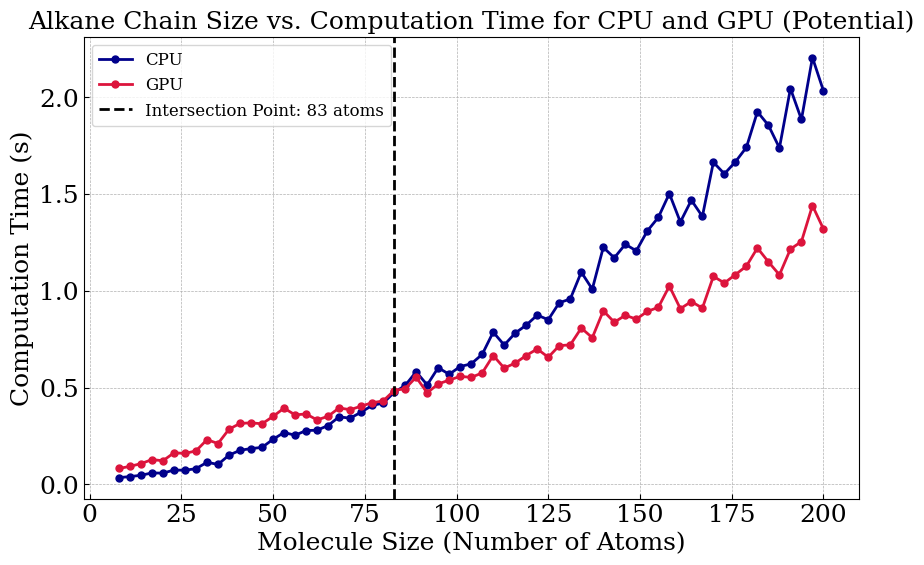

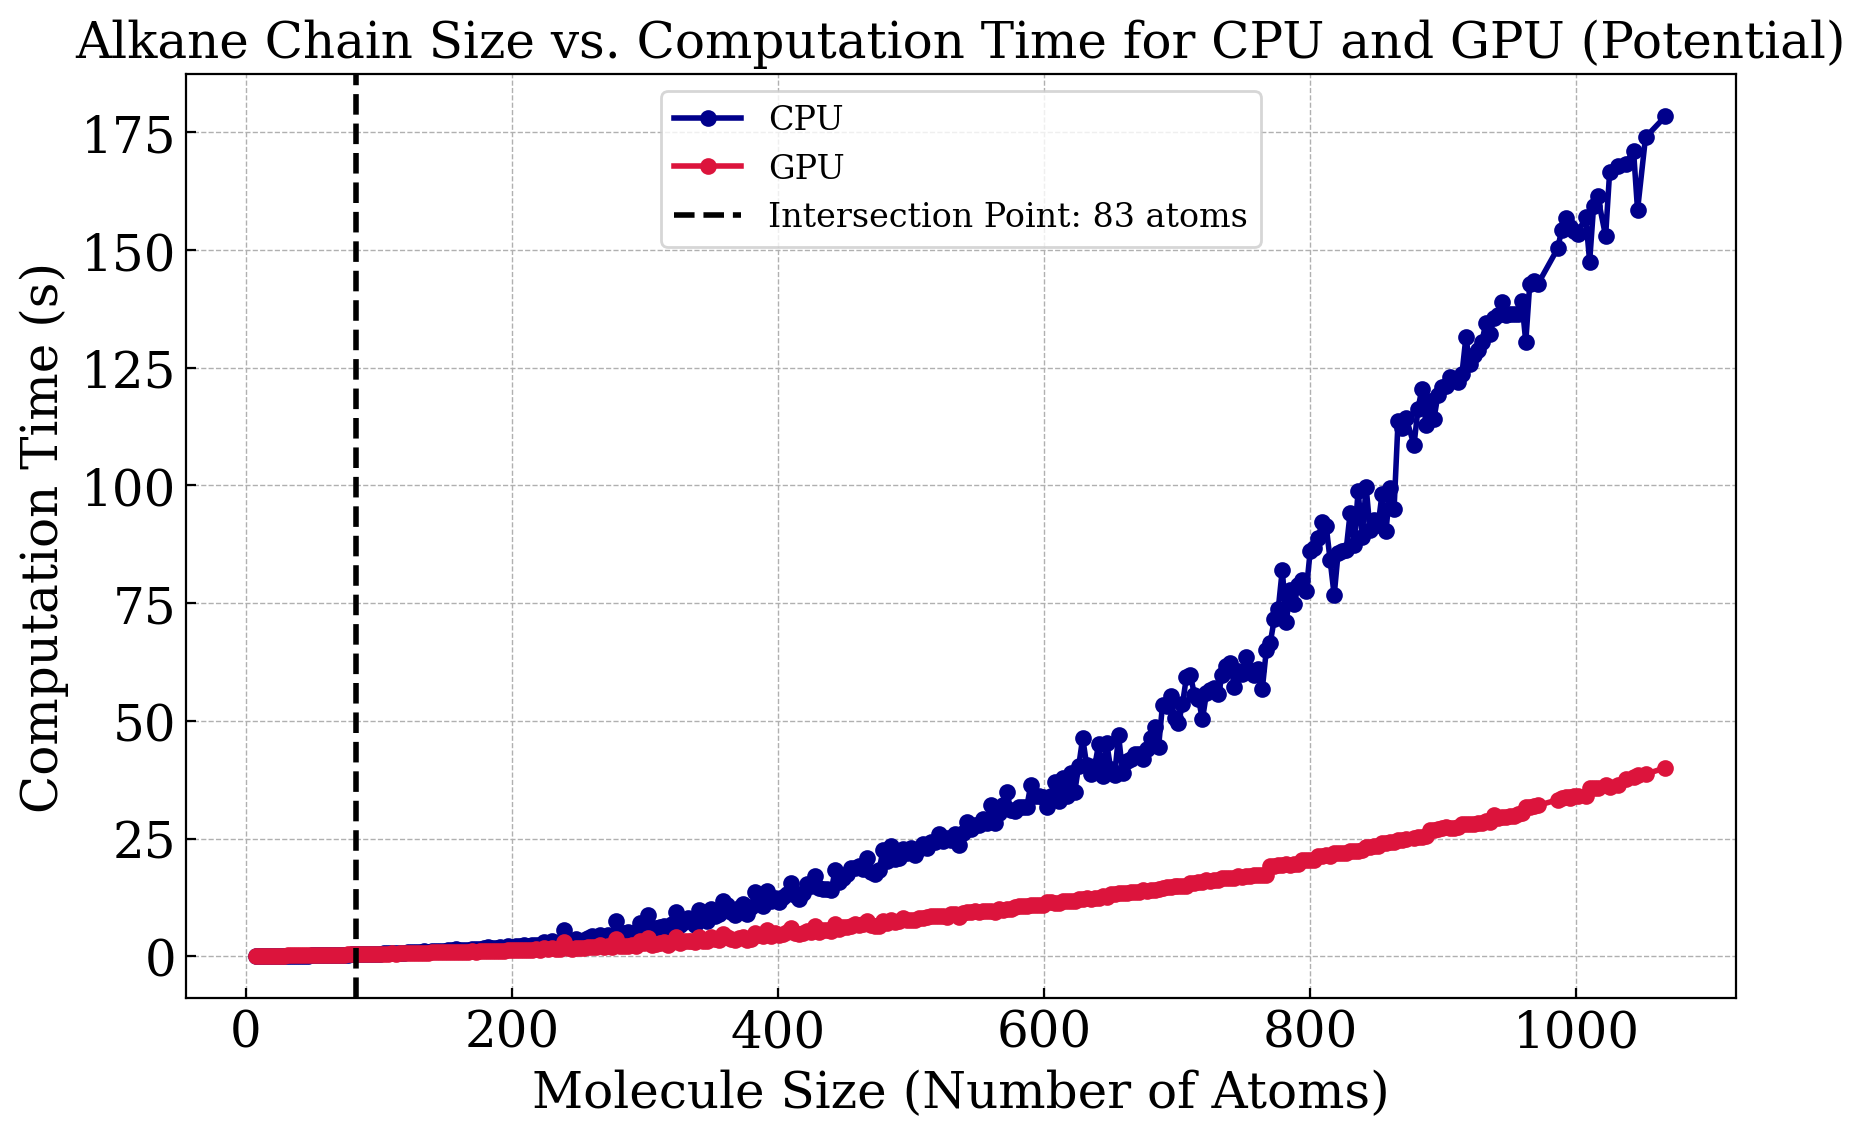

In [2]:
keyword = "Potential"
res_curve = parse_curve_log("../logs/alkane_chain_E_curve.txt", keyword=keyword)
fig = plot_curve_times(res_curve[275:-1], dpi=200, keyword=keyword)
fig = plot_curve_times(res_curve[:-1], dpi=200, keyword=keyword)

Text(0.5, 1.0, 'Potential time percentage')

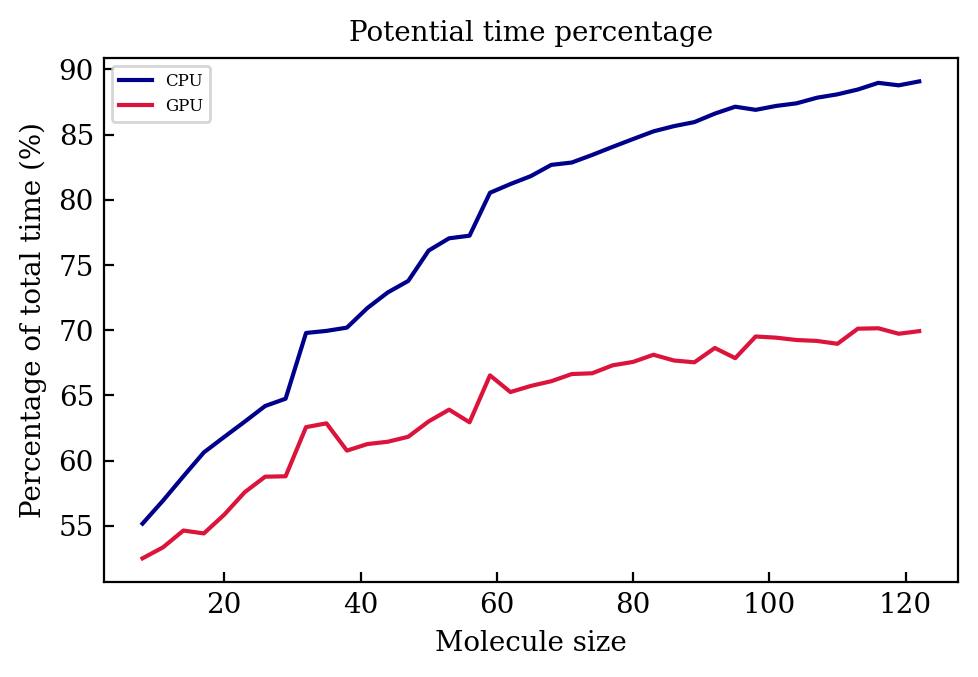

In [5]:
import matplotlib.pyplot as plt

mol_size = []
SCF_CPU_percentage = []
SCF_GPU_percentage = []

for mol_res in res_curve:
    try:
        SCF_CPU_percentage.append(mol_res['computations'][1]['times'][0]['percentage'])
        SCF_GPU_percentage.append(mol_res['computations'][0]['times'][0]['percentage'])
        mol_size.append(mol_res['n'])
    except:
        continue


apply_formatting(dpi=200)
plt.plot(mol_size[300:-1], SCF_CPU_percentage[300:-1], label="CPU", color="darkblue")
plt.plot(mol_size[300:-1], SCF_GPU_percentage[300:-1], label="GPU", color="crimson")
plt.xlabel("Molecule size")
plt.ylabel("Percentage of total time (%)")
plt.legend()
plt.title(f"{keyword} time percentage")


# Batch curve plot

In [4]:
res_batch_curve = parse_grid_log("../logs/alkane_chain_E_batch_curve.txt", keyword="Total")

batch_sizes = []
CPU_time = []
GPU_time = []

print(f"Molecule: {res_batch_curve[0]['molecule']}")
for batch_computation in res_batch_curve[0]["computations"]:
    if batch_computation["device"] == 'cuda:0':
        batch_sizes.append(batch_computation["n_batch"])
        GPU_time.append(batch_computation["times"][0]["time"])
    elif batch_computation["device"] == 'cpu':
        CPU_time.append(batch_computation["times"][0]["time"])
    else:
        print(f"{batch_computation['device']} not recognized")

print(f"len batch_sizes: {len(batch_sizes)}")
print(f"len CPU_time: {len(CPU_time)}")
print(f"len GPU_time: {len(GPU_time)}")

apply_formatting(dpi=200)
plt.plot(batch_sizes[1:], CPU_time[1:], label="CPU", color="darkblue")
plt.plot(batch_sizes[1:], GPU_time[1:], label="GPU", color="crimson")
plt.xlabel("Batch size")
plt.ylabel("Time (s)")
plt.legend()
plt.title(f"Computation time vs batch size for {res_batch_curve[0]['molecule']}")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../logs/alkane_chain_E_batch_curve.txt'